# **MNIST Handwritten Digits Classification using ANN**

## **1. Problem Statement : Identify digits from a dataset of handwritten images**


The *MNIST (Modified National Institute of Standards and Technology)* Handwritten Digit Classification Dataset consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



## **2. Import Libraries**

In [1]:
#=================================================================
# For data manipulation, plotting, and miscellaneous
#=================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import calendar
from datetime import datetime

from PIL import Image
import cv2  # For Image processing
#===============================================================================================
# Import Keras models, layers, activation functions
#===============================================================================================
import tensorflow as tf
tf.random.set_seed(3)
import keras
from keras import datasets, models
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, ReLU, LeakyReLU, Dropout
from keras import regularizers
from keras import optimizers
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping
from tensorflow.math import confusion_matrix
#=================================================================
# From sklearn import required classes
#=================================================================
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report

## **3. Load the Dataset and Perform Visualization**

### **3.1. Load the Dataset**

**Dataset Information:     https://keras.io/api/datasets/mnist/**

In [2]:
# Loading MNIST dataset
(x_train,y_train), (x_test,y_test) = mnist.load_data()

### **3.2. Visualize the Data**

In [3]:
# shape of arrays
# Image dimension  --> 28 x 28
# Grayscale Image  --> 1 channel

print(x_train.shape)   # Training data = 60,000 Images
print(x_test.shape)    # Test data = 10,000 Images
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
print(x_train[0].shape)   # image size : 28x28 pixels

(28, 28)


Image label : 4


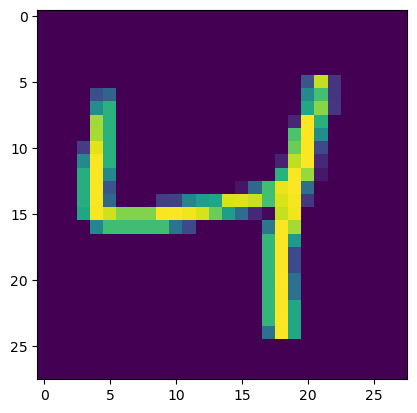

In [5]:
# Displaying the image 

img_no = 2     # plot the image located at index #

plt.imshow(x_train[img_no])                    # plot the image 
print("Image label :" , y_train[img_no])       # and corresponding label

In [6]:
# Unique values in the y_train 
print(np.unique(y_train))

# Unique values in the y_test 
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**We can use these labels [0 1 2 3 4 5 6 7 8 9] as such or we can also apply One Hot Encoding                      --> In this project we are NOT using one-hot encoding.**

**All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension ---> In this project, it is NOT required to resize the images.**

### **3.3. Normalizing the Input data**

In [7]:
# Normalizing the input to be within the range [0,1]
#intensity of each pixel is divided by 255 (the maximum intensity value)

x_train = x_train / 255
x_test = x_test / 255

In [8]:
print(x_test[0].min(), ",", x_test[0].max())  # for one image located at index # 0

0.0 , 1.0


## **4. ANN Model**

### **4.1. Create ANN Model**

In [9]:
input_image_shape = (28,28)   # input image size
#===============================================================
# create Sequential model 

model = Sequential()

# Since our input is an image data, hence first we need to flatten the image to 1D vector to feed in to ANN,
# hence first we will add "Flatten layer" as input layer, after that we need to add Dense layer as hidden layer
model.add(Flatten(input_shape = input_image_shape, name='Inputlayer')) 
model.add(Dense(128, activation='relu', name ='Hiddenlayer_1'))
model.add(Dense(64, activation='relu', name ='Hiddenlayer_2'))
model.add(Dense(10, activation='softmax', name ='Outputlayer'))  # softmax is for multi-class classification, we have 10 classes [0-9]

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputlayer (Flatten)        (None, 784)               0         
                                                                 
 Hiddenlayer_1 (Dense)       (None, 128)               100480    
                                                                 
 Hiddenlayer_2 (Dense)       (None, 64)                8256      
                                                                 
 Outputlayer (Dense)         (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


### **4.2. Compile the model**

**As our labels (y_train, y_test) are numbers like 0,1,2,3,.. which are not one-hot encoded, so we need to use sparse_categoritcal_crossentropy as loss function.**

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **4.3. Train the Model**

In [12]:
print('Total training data size:',60000*0.8)   # for validation split = 0.2

Total training data size: 48000.0


In [13]:
print('Batch size:', 48000/128.0)  # for batch size = 128 samples

Batch size: 375.0


In [14]:
np_epochs = 15
batchsize = 128 

earlystop = EarlyStopping(monitor='val_accuracy', patience = 3, min_delta = 0.01, mode = 'max')

#===========================================================================================
training = model.fit(x_train, y_train, 
                    validation_split=0.2,
                    batch_size = batchsize, 
                    epochs = np_epochs,
                    callbacks=[earlystop])

Epoch 1/15
375/375 [==============================] - 2s 3ms/step - loss: 0.3760 - accuracy: 0.8941 - val_loss: 0.1901 - val_accuracy: 0.9428
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1577 - accuracy: 0.9543 - val_loss: 0.1345 - val_accuracy: 0.9618
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1084 - accuracy: 0.9683 - val_loss: 0.1084 - val_accuracy: 0.9670
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0821 - accuracy: 0.9752 - val_loss: 0.0999 - val_accuracy: 0.9693
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0640 - accuracy: 0.9809 - val_loss: 0.0954 - val_accuracy: 0.9701


### **4.4. Save the Trained NN model**

In [15]:
model.save("DL_MNIST_Digits_Classification_ANN_Trained_Model.h5")

### **4.5. Plot the Accuracy and Loss history**

In [16]:
type(training)

keras.callbacks.History

In [17]:
type(training.history)   # training history is a dictionary which stores the training log 

dict

In [18]:
training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
training.history

{'loss': [0.37601733207702637,
  0.15770116448402405,
  0.10837830603122711,
  0.08205565810203552,
  0.06395649909973145],
 'accuracy': [0.8940625190734863,
  0.9543125033378601,
  0.9683333039283752,
  0.9751874804496765,
  0.9808750152587891],
 'val_loss': [0.19014805555343628,
  0.13446900248527527,
  0.10843724757432938,
  0.09986796230077744,
  0.09538216143846512],
 'val_accuracy': [0.9428333044052124,
  0.9618333578109741,
  0.9670000076293945,
  0.9693333506584167,
  0.9700833559036255]}

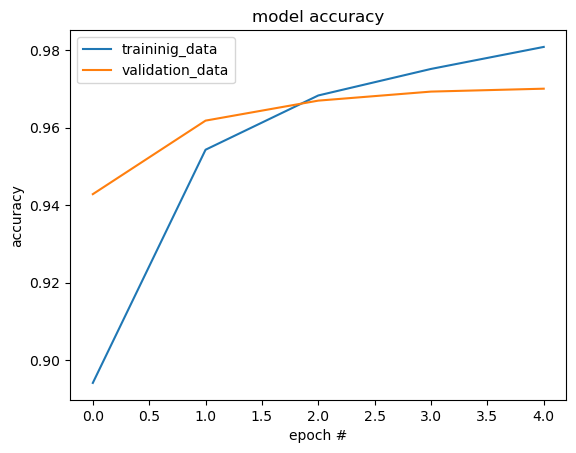

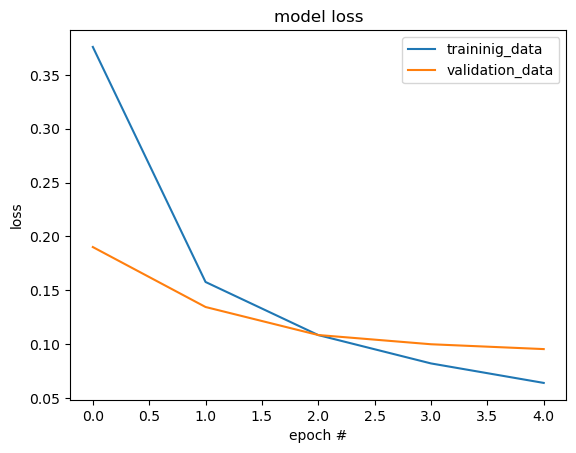

In [20]:
#============================================
# Plot the accuracy and loss curves 
#============================================
plt.plot(training.history['accuracy'], label='traininig_data')
plt.plot(training.history['val_accuracy'], label='validation_data')
plt.legend()
plt.title("model accuracy")
plt.xlabel("epoch #")
plt.ylabel("accuracy")
plt.show()

plt.plot(training.history['loss'], label='traininig_data')
plt.plot(training.history['val_loss'], label='validation_data')
plt.legend()
plt.title("model loss")
plt.xlabel("epoch #")
plt.ylabel("loss")
plt.show()

### **4.6. Evaluate the Model on Test Dataset**

In [21]:
# here first the trained model will predict the labels (y_predict) for the x_test data, then it will compare them with y_test
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.9735


In [22]:
print("Test accuracy : ", test_accuracy)

Test accuracy :  0.9735000133514404


In [23]:
print(x_test.shape)

(10000, 28, 28)


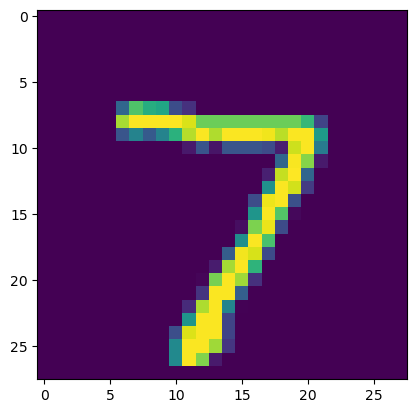

In [24]:
# first data point in X_test
plt.imshow(x_test[0])

In [25]:
print(y_test[0])   # first label in test data set

7


### **4.7. Prediction for Test dataset**

In [26]:
y_pred = model.predict(x_test)    #model.predict() gives the probability of each class for each data point

313/313 [==============================] - 0s 1ms/step


In [27]:
y_pred.shape

(10000, 10)

In [28]:
y_pred[0]

array([8.4601059e-05, 1.3493204e-06, 2.5520034e-04, 6.7705768e-03,
       5.2923882e-10, 3.2191069e-06, 1.4655989e-09, 9.9233305e-01,
       2.5686939e-05, 5.2640948e-04], dtype=float32)

In [29]:
np.argmax(y_pred[0])  # index value of the maximum probability value which is nothing but class value

7

In [30]:
#converting the prediction probabilities to class label for all test data point

y_pred_labels = [np.argmax(x) for x in y_pred]  # List comprehension

In [31]:
type(y_pred_labels)

list

In [32]:
y_pred_labels[0]

7

### **4.8. Confusion Matrix**

y_test  -->  True labels

y_pred_labels  -->  Predicted Labels

In [33]:
confusion_mat = confusion_matrix(y_test, y_pred_labels)

In [34]:
confusion_mat

array([[ 972,    1,    0,    2,    2,    1,    0,    0,    1,    1],
       [   0, 1121,    4,    1,    0,    0,    4,    1,    4,    0],
       [  10,    2, 1004,    5,    0,    0,    2,    5,    4,    0],
       [   2,    0,    3,  987,    0,    5,    0,    3,    5,    5],
       [   3,    1,    4,    0,  963,    0,    2,    2,    0,    7],
       [   3,    1,    0,    8,    1,  864,    4,    1,    6,    4],
       [  14,    2,    2,    0,    5,    5,  928,    0,    2,    0],
       [   3,    9,   12,    2,    1,    0,    0,  985,    1,   15],
       [   8,    3,    3,    2,    4,    5,    4,    2,  939,    4],
       [   5,    5,    0,    4,   14,    4,    0,    3,    2,  972]],
      dtype=int64)

Text(0.5, 36.72222222222221, 'Predicted Labels')

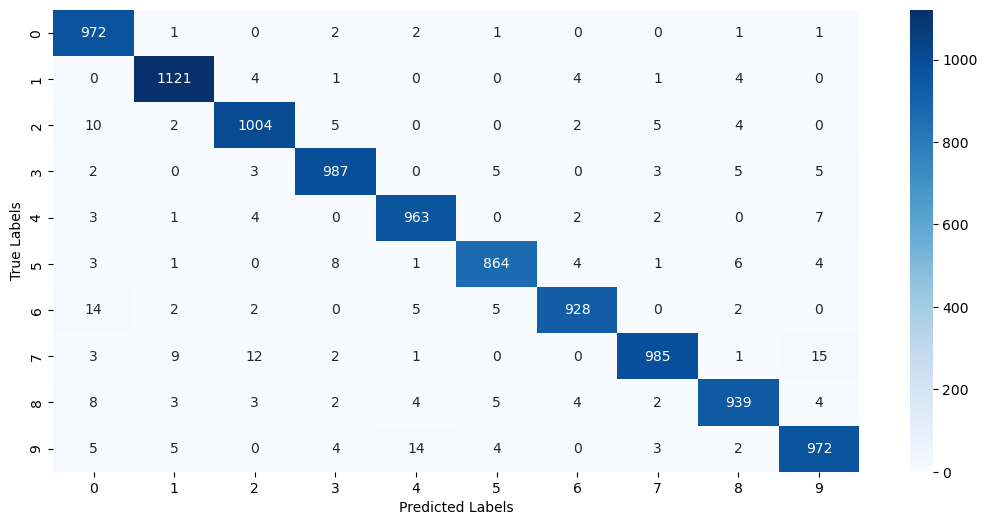

In [35]:
plt.figure(figsize=(13,6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

For Example : 968 images of Class '0' are predicted correctly, 

1122 images of Class '1' are predicted correctly ....

The values in the diagonal are correct predictions, rest are incorrect predictions.

### **4.9. Classification Report**

In [36]:
# Print a Classification Report and the accuracy score (classification accuracy)
#===================================================================================================
from sklearn.metrics import confusion_matrix , classification_report
# sklearn.metrics.classification_report(y_true, y_pred,)

y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]     # get the maximum probability class number (here it is same as index value)

print("-------------------------------------------------------------------")
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

print("-------------------------------------------------------------------")
print("Classification accuracy on Test Dataset: %0.6f" % metrics.accuracy_score(y_test, y_pred_classes))

313/313 [==============================] - 0s 1ms/step
-------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

-------------------------------------------------------------------
Classification accuracy o

### **4.10. Prediction System**

#### **4.10.1. For Image from Test Dataset**

1/1 [==============================] - 0s 48ms/step
predicted probability :  [[3.8926974e-06 1.2447589e-04 1.1699327e-06 6.8081543e-03 4.1705610e-07
  9.9278331e-01 6.8110144e-06 1.0135957e-06 1.4549417e-04 1.2511833e-04]]
 
    Actual Label: 5
    Predicted Label: 5


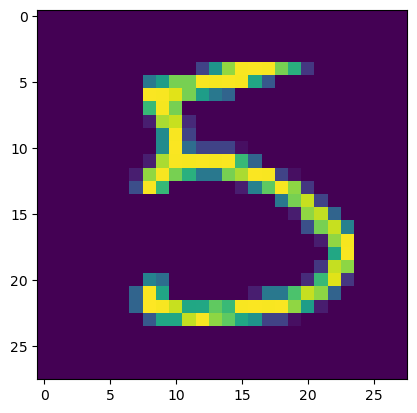

In [37]:

test_sample_index = 15  # index value of the sample (from test dataset), for which prediction will be made

#==========================================================================================

prediction = model.predict(x_test[test_sample_index])
print("predicted probability : ", prediction)

prediction_label = np.argmax(prediction)  # finding the index of maximum probability value

print(" ")
print("======================================================")
print("    Actual Label:" , y_test[test_sample_index])
print("    Predicted Label:", prediction_label )
print("======================================================")

plt.imshow(x_test[test_sample_index])

#### **4.10.2. For an imported Image**

In [38]:
img = cv2.imread('MNIST_digit.png')

In [39]:
img.shape   # it is a colored image

(318, 318, 3)

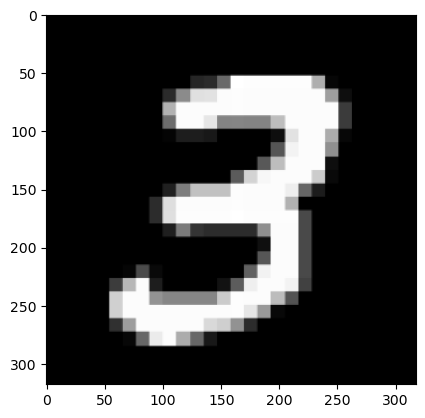

In [40]:
plt.imshow(img)

In [41]:
img_grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [42]:
img_grayscale.shape

(318, 318)

In [43]:
img_resize = cv2.resize(img_grayscale,(28,28))

In [44]:
img_resize.shape

(28, 28)

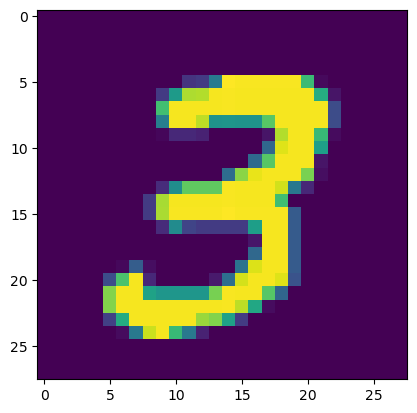

In [45]:
plt.imshow(img_resize)

In [46]:
# since we trained our ANN model with scaled images, so we need to input the scaled image for prediction
img_resize_scaled = img_resize/255 

In [47]:
img_reshaped = np.reshape(img_resize_scaled, [1,28,28])  
# since we are giving only one image for prediction, hence mentioned [1,28,28], 1 will be changed as per the number of images 

1/1 [==============================] - 0s 17ms/step
predicted probability :  [[3.7423950e-10 1.7705805e-09 7.6761175e-09 9.9999821e-01 8.8609845e-15
  3.6143224e-08 2.8676684e-15 4.9787370e-09 4.6055106e-07 1.3635271e-06]]
 
    Predicted Label: 3


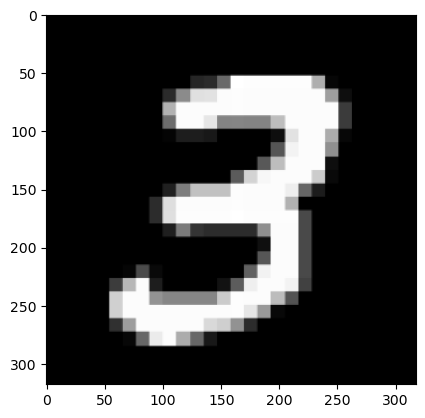

In [48]:
img_predicted_prob = model.predict(img_reshaped)
print("predicted probability : ", img_predicted_prob)

img_predicted_label = np.argmax(img_predicted_prob)  # finding the index of maximum probability value

print(" ")
print("======================================================")
print("    Predicted Label:", img_predicted_label )
print("======================================================")

plt.imshow(img)


## **End of the Project**